#### Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle

##### Lendo e separando as features do Dataset

In [3]:
waits = pd.read_csv("amostra_V2_classificado.csv", sep=';')

features = ['PAGEIOLATCH_EX', 'PAGEIOLATCH_UP', 'PAGEIOLATCH_SH',
       'SOS_SCHEDULER_YIELD', 'RESOURCE_SEMAPHORE', 'CMEMTHREAD',
       'IO_COMPLETION', 'ASYNC_IO_COMPLETION', 'WRITELOG', 'ASYNC_NETWORK_IO', 'DBMIRROR_SEND']
targets = ['problema_CPU', 'problema_Memoria', 'problema_Disco', 'problema_Rede']

X_var = waits[features].values 
y_var = waits[targets].values 
waits.head()

,PAGEIOLATCH_EX,PAGEIOLATCH_UP,PAGEIOLATCH_SH,SOS_SCHEDULER_YIELD,RESOURCE_SEMAPHORE,CMEMTHREAD,IO_COMPLETION,ASYNC_IO_COMPLETION,WRITELOG,ASYNC_NETWORK_IO,DBMIRROR_SEND,problema_CPU,problema_Memoria,problema_Disco,problema_Rede
0,0.008461,2.069500,0.497176,3.079632,0.022213,0.000590,0.157974,0.784687,3.200482,90.179286,0,0,0,0,1
1,0.043867,1.358528,0.831230,2.059481,0.000000,0.000013,0.368211,2.308586,11.609791,81.420293,0,0,0,0,1
2,0.017282,9.663445,2.610020,1.315094,0.000000,0.000756,0.060461,1.482049,7.876599,76.974294,0,0,0,0,1
3,0.007251,2.953124,1.064196,10.414366,0.000000,0.007351,1.287346,1.061271,6.975913,76.229181,0,0,0,0,1
4,0.030714,11.233737,2.515191,0.270699,0.000000,0.003069,0.499143,2.745886,6.684178,76.017382,0,0,0,0,1


#### Informações sobre o Dataset

In [4]:
waits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAGEIOLATCH_EX       42 non-null     float64
 1   PAGEIOLATCH_UP       42 non-null     float64
 2   PAGEIOLATCH_SH       42 non-null     float64
 3   SOS_SCHEDULER_YIELD  42 non-null     float64
 4   RESOURCE_SEMAPHORE   42 non-null     float64
 5   CMEMTHREAD           42 non-null     float64
 6   IO_COMPLETION        42 non-null     float64
 7   ASYNC_IO_COMPLETION  42 non-null     float64
 8   WRITELOG             42 non-null     float64
 9   ASYNC_NETWORK_IO     42 non-null     float64
 10  DBMIRROR_SEND        42 non-null     int64  
 11  problema_CPU         42 non-null     int64  
 12  problema_Memoria     42 non-null     int64  
 13  problema_Disco       42 non-null     int64  
 14  problema_Rede        42 non-null     int64  
dtypes: float64(10), int64(5)
memory usage: 5.0

#### Divisão dos conjuntos de Teste e Treinamento

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 6)

#### Criando o modelo Decision Tree (Scikit-learn)

In [25]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print('Acurácia: {:.0%}'.format(accuracy_score(y_test, pred_model)))

Acurácia: 67%


#### Plotando a Matriz de Confusão

In [7]:
y_true = y_test
y_pred  = pred_model

cm = multilabel_confusion_matrix(y_true, y_pred)
print(cm)

[[[5 0]
  [0 1]]

 [[6 0]
  [0 0]]

 [[4 1]
  [0 1]]

 [[3 0]
  [0 3]]]


#### Plotando a Decision Tree

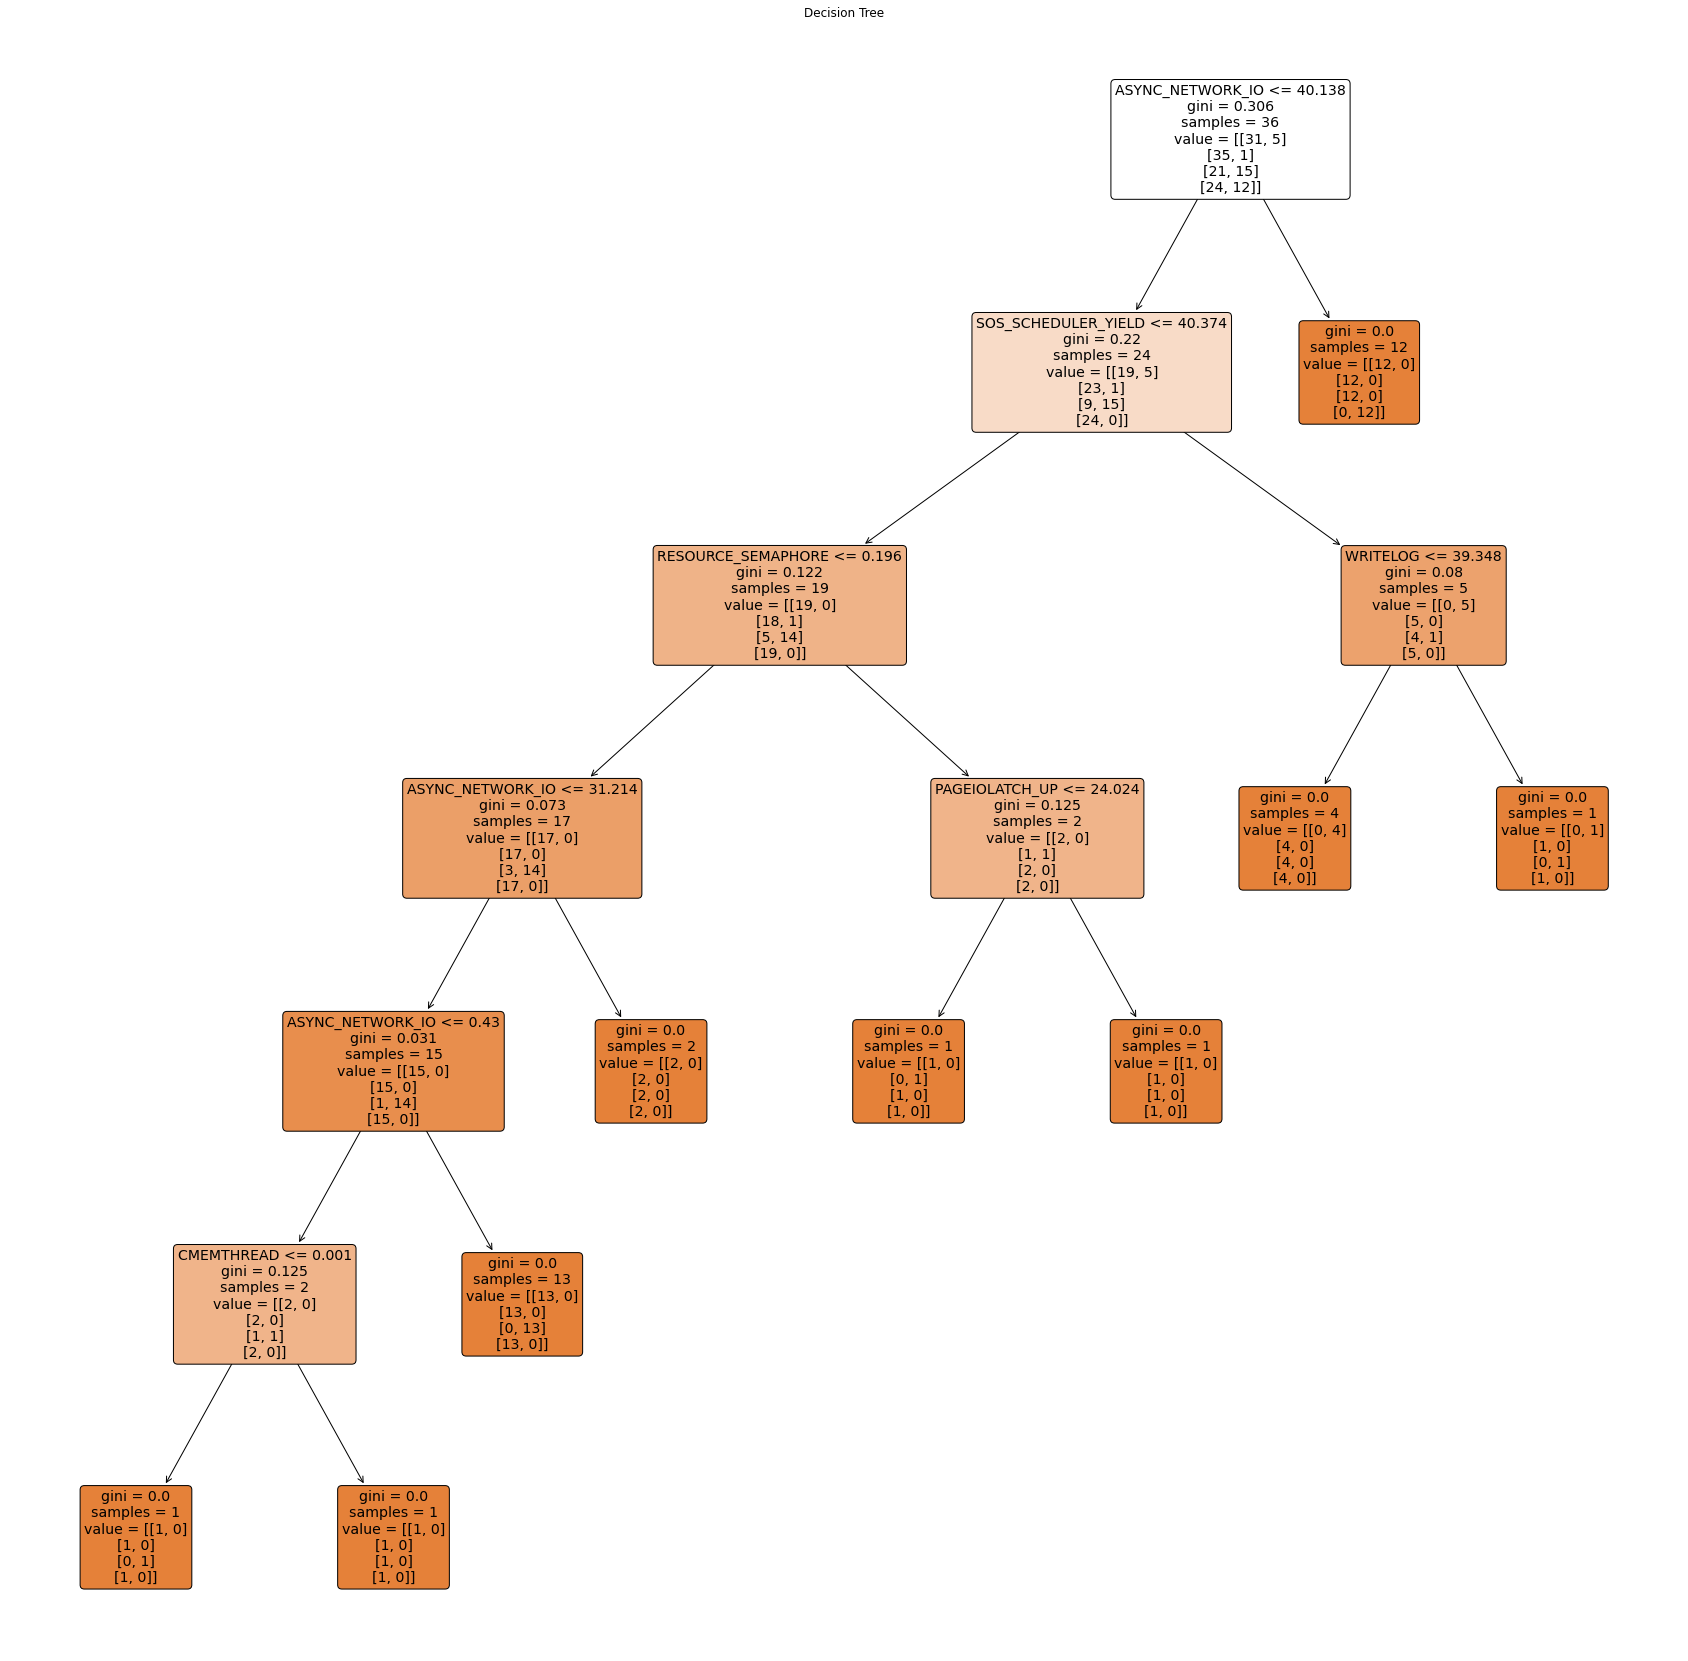

In [8]:
_, ax = plt.subplots(figsize=(30,30))

plot_tree(model, 
        feature_names = features, 
        class_names = targets, 
        filled = True, 
        rounded = True,
        ax=ax         
        )
          
plt.title("Decision Tree")
plt.savefig('DecisionTree__V2.png')

#### Exportando o modelo treinado (.pkl)

In [9]:
decision_tree_pkl_filename = 'DecisionTree__V2.pkl'

decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')

pickle.dump(model, decision_tree_model_pkl)

decision_tree_model_pkl.close()